# Pseudospectral method for periodic functions
Sean Wade

In [20]:
import numpy as np
from scipy.fftpack import fft, ifft
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Problem 1

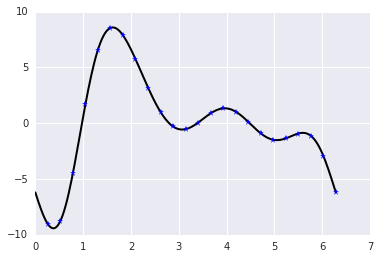

In [13]:
N=24
x1 = (2.*np.pi/N)*np.arange(1,N+1)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

# This array is reordered in Python to
# accomodate the ordering inside the fft function in scipy.
k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}✬(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0,1) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))
fpp_hat = ((1j*k)**2*(f_hat))
fpp = np.real(ifft(fpp_hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
                np.sin(x2)**3. +
                2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
                )

derivative2 = -2*np.exp(2*np.sin(x2+1))*np.sin(x2+1) + np.cos(x2)*(2*(np.cos(x2))**2 - 2*(np.sin(x2)**2))\
                + 4*np.exp(2*np.sin(x2+1))*(np.cos(x2+1)**2)-5*np.sin(x2)**2*np.cos(x2)

plt.plot(x2,.5*derivative2-derivative,'-k',linewidth=2.)
plt.plot(x1,.5*fpp - fp,'*b')
plt.savefig('spectral2_derivative.pdf')
plt.show()

## Problem 2

In [23]:
def RK4(f, y0, t0, t1, n):
    """ Use the RK4 method to compute an approximate solution
    to the ODE y✬ = f(t, y) at n equispaced parameter values from t0 to t
    with initial conditions y(t0) = y0.
    ✬y0✬ is assumed to be either a constant or a one-dimensional numpy array.
    ✬t0✬ and ✬t1✬ are assumed to be constants.
    ✬f✬ is assumed to accept two arguments.
    The first is a constant giving the current value of t.
    The second is a one-dimensional numpy array of the same size as y.
    This function returns an array Y of shape (n,) if
    y is a constant or an array of size 1.
    It returns an array of shape (n, y.size) otherwise.
    In either case, Y[i] is the approximate value of y at
    the i✬th value of np.linspace(t0, t, n).
    """
    # Initialize All
    if isinstance(y0, np.ndarray):
        Y = np.empty((n, y0.size),dtype=complex).squeeze()
    else:
        Y = np.empty(n,dtype=complex)
    Y[0] = y0
    T = np.linspace(t0, t1, n)
    h = float(t1 - t0) / (n - 1)

    for i in xrange(1, n):
        K1 = f(T[i-1], Y[i-1])
        tplus = (T[i] + T[i-1]) * .5
        K2 = f(tplus, Y[i-1] + .5 * h * K1)
        K3 = f(tplus, Y[i-1] + .5 * h * K2)
        K4 = f(T[i], Y[i-1] + h * K3)
        Y[i] = Y[i-1] + (h / 6.) * (K1 + 2 * K2 + 2 * K3 + K4)
    return T, Y

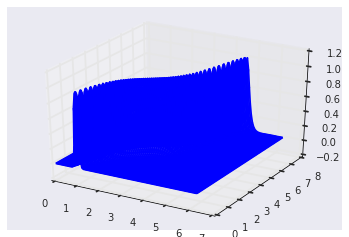

In [26]:
N = 100
t_linspace = np.linspace(0,8,150)
x_linspace = np.linspace(0,2*np.pi, N)

def c(x):
    return .2 + np.sin(x-1)**2


Ut_0 = lambda x: np.exp(-100*(x-1)**2)
U0 = Ut_0(x_linspace)

k = np.concatenate(( np.arange(0,N/2) ,
    np.array([0]) ,
    np.arange(-N/2+1,0,1) ))

f = lambda t,y :np.real((-1)*c(x_linspace) * ifft(1j * k * fft(y)))

sol = RK4(f, U0, 0, 8, 150)[1]

X,Y = np.meshgrid(x_linspace, t_linspace)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X,Y,sol)
plt.show()